# Test OSMnx

In [14]:
import osmnx as ox
import pandas as pd

import geopandas as gpd
from shapely import wkt


from geopandas.tools import sjoin

In [15]:
ox.config(use_cache=True, log_console=True)

/var/folders/ly/rt519r9j7sx5syy44_l85hz80000gn/T/ipykernel_50214/3742396485.py:1: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


In [16]:
# Get the driveable street network for Manhattan
place_name = "Manhattan, New York City, New York, USA"
graph = ox.graph_from_place(place_name, network_type='walk', simplify=True, retain_all=True)


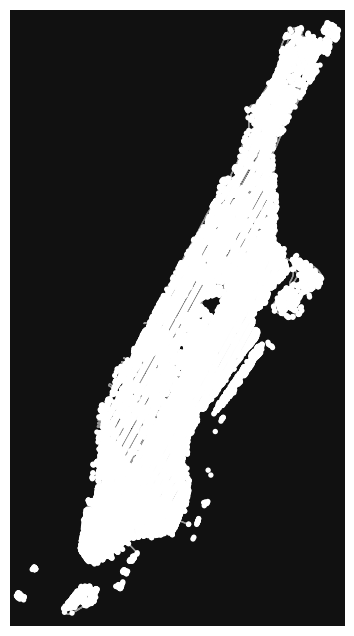

In [17]:
# Plot the street network
fig, ax = ox.plot_graph(graph)

In [18]:
import matplotlib.pyplot as plt
# Save the figure as an SVG file
plt.savefig("graph.svg", format="svg")

<Figure size 640x480 with 0 Axes>

In [19]:
nodes, edges = ox.graph_to_gdfs(graph)


In [20]:
print(nodes)

                     y          x  street_count          highway  ref  \
osmid                                                                   
30807314     40.790720 -73.963576             4              NaN  NaN   
30978752     40.774776 -73.974360             4              NaN  NaN   
42421728     40.798048 -73.960044             3  traffic_signals  NaN   
42421731     40.798654 -73.961474             4  traffic_signals  NaN   
42421737     40.799244 -73.962873             4  traffic_signals  NaN   
...                ...        ...           ...              ...  ...   
10966418754  40.690644 -74.045780             5              NaN  NaN   
10966418762  40.690510 -74.045611             3              NaN  NaN   
10966418767  40.690530 -74.045786             3              NaN  NaN   
10966418768  40.690633 -74.045584             3              NaN  NaN   
10966418769  40.689714 -74.044943             3              NaN  NaN   

                               geometry  
osmid   

In [21]:
nodes["highway"].unique()

array([nan, 'traffic_signals', 'crossing', 'stop', 'turning_circle',
       'motorway_junction', 'turning_loop', 'give_way', 'elevator',
       'bus_stop'], dtype=object)

In [22]:
nodes_smaller = nodes[nodes['highway'].isna()]

In [23]:
nodes_smaller

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
30807314,40.790720,-73.963576,4,NaN,NaN,POINT (-73.96358 40.79072)
30978752,40.774776,-73.974360,4,NaN,NaN,POINT (-73.97436 40.77478)
42421751,40.802268,-73.970050,4,NaN,NaN,POINT (-73.97005 40.80227)
42421778,40.785592,-73.982004,3,NaN,NaN,POINT (-73.98200 40.78559)
42421785,40.858744,-73.930122,3,NaN,NaN,POINT (-73.93012 40.85874)
...,...,...,...,...,...,...
10966418754,40.690644,-74.045780,5,NaN,NaN,POINT (-74.04578 40.69064)
10966418762,40.690510,-74.045611,3,NaN,NaN,POINT (-74.04561 40.69051)
10966418767,40.690530,-74.045786,3,NaN,NaN,POINT (-74.04579 40.69053)


In [52]:
edges

osmid    highway  oneway reversed   length  \
u           v           key                                                    
30807314    4332491202  0     147089927       path   False     True   12.695   
            2057103273  0      46613689  bridleway   False    False  159.255   
            6579409036  0      46613689  bridleway   False     True   58.144   
            1203806263  0     147089927       path   False    False   28.607   
30978752    4257949514  0     426425334    footway   False    False    5.799   
...                                 ...        ...     ...      ...      ...   
10966418768 10966418762 0    1180777644    footway   False    False   15.260   
            10966418754 0    1180777644    footway   False     True   19.230   
10966418769 8262932457  0      32965472    footway   False    False   43.660   
            371241566   0      32965472    footway   False     True   99.042   
            10966418762 0    1180777648    footway   False     True  104.891   

                                                                      geometry  \
u           v           key                                                      
30807314    4332491202  0    LINESTRING (-73.96358 40.79072, -73.96368 40.7...   
            2057103273  0    LINESTRING (-73.96358 40.79072, -73.96360 40.7...   
            6579409036  0    LINESTRING (-73.96358 40.79072, -73.96354 40.7...   
            1203806263  0    LINESTRING (-73.96358 40.79072, -73.96353 40.7...   
30978752    4257949514  0    LINESTRING (-73.97436 40.77478, -73.97441 40.7...   
...                                                                        ...   
10966418768 10966418762 0    LINESTRING (-74.04558 40.69063, -74.04558 40.6...   
            10966418754 0    LINESTRING (-74.04558 40.69063, -74.04560 40.6...   
10966418769 8262932457  0    LINESTRING (-74.04494 40.68971, -74.04471 40.6...   
            371241566   0    LINESTRING (-74.04494 40.68971, -74.04516 40.6...   
            10966418762 0    LINESTRING (-74.04494 40.68971, -74.04548 40.6...   

                                              name maxspeed lanes  ref  \
u           v           key                                              
30807314    4332491202  0                      NaN      NaN   NaN  NaN   
            2057103273  0                      NaN      NaN   NaN  NaN   
            6579409036  0                      NaN      NaN   NaN  NaN   
            1203806263  0                      NaN      NaN   NaN  NaN   
30978752    4257949514  0    Central Park Driveway      NaN   NaN  NaN   
...                                            ...      ...   ...  ...   
10966418768 10966418762 0                      NaN      NaN   NaN  NaN   
            10966418754 0                      NaN      NaN   NaN  NaN   
10966418769 8262932457  0                      NaN      NaN   NaN  NaN   
            371241566   0                      NaN      NaN   NaN  NaN   
            10966418762 0                      NaN      NaN   NaN  NaN   

                            service access tunnel width bridge junction  \
u           v           key                                               
30807314    4332491202  0       NaN    NaN    NaN   NaN    NaN      NaN   
            2057103273  0       NaN    NaN    NaN   NaN    NaN      NaN   
            6579409036  0       NaN    NaN    NaN   NaN    NaN      NaN   
            1203806263  0       NaN    NaN    NaN   NaN    NaN      NaN   
30978752    4257949514  0       NaN    NaN    NaN   NaN    NaN      NaN   
...                             ...    ...    ...   ...    ...      ...   
10966418768 10966418762 0       NaN    NaN    NaN   NaN    NaN      NaN   
            10966418754 0       NaN    NaN    NaN   NaN    NaN      NaN   
10966418769 8262932457  0       NaN    NaN    NaN   NaN    NaN      NaN   
            371241566   0       NaN    NaN    NaN   NaN    NaN      NaN   
            10966418762 0       NaN    NaN    NaN   NaN    NaN 

In [53]:
edges.columns

Index(['osmid', 'highway', 'oneway', 'reversed', 'length', 'geometry', 'name',
       'maxspeed', 'lanes', 'ref', 'service', 'access', 'tunnel', 'width',
       'bridge', 'junction', 'est_width', 'area'],
      dtype='object')

In [68]:
unique_values = edges['highway'].apply(str).unique()
print(unique_values)


['path' 'bridleway' 'footway' 'secondary' 'residential' 'primary'
 'tertiary' "['steps', 'footway']" 'service' 'trunk' 'unclassified'
 "['pedestrian', 'footway']" "['primary', 'residential']"
 "['residential', 'secondary']" 'pedestrian' 'tertiary_link'
 'living_street' 'secondary_link' 'primary_link' 'steps'
 "['residential', 'steps']" "['secondary', 'unclassified']" 'trunk_link'
 "['service', 'footway']" "['residential', 'primary']"
 "['tertiary', 'residential']" 'track' "['path', 'footway']"
 "['residential', 'trunk']" "['primary', 'secondary']"
 "['residential', 'footway']" "['secondary_link', 'unclassified']"
 "['tertiary', 'unclassified']" "['path', 'steps']"
 "['pedestrian', 'steps', 'footway']" "['service', 'secondary_link']"
 "['residential', 'unclassified']" "['path', 'residential']"
 "['secondary', 'secondary_link']" "['track', 'path']"
 "['path', 'steps', 'footway']" "['primary', 'primary_link']"
 "['residential', 'service']" "['pedestrian', 'unclassified']"
 "['pedestrian',

In [66]:
flattened = [item for sublist in edges['highway'].tolist() for item in sublist]
unique_values = pd.unique(flattened)
print(unique_values)

['p' 'a' 't' 'h' 'b' 'r' 'i' 'd' 'l' 'e' 'w' 'y' 'f' 'o' 's' 'c' 'n' 'm'
 'steps' 'footway' 'v' 'u' 'k' 'pedestrian' 'primary' 'residential'
 'secondary' '_' 'g' 'unclassified' 'service' 'tertiary' 'path' 'trunk'
 'secondary_link' 'track' 'primary_link' 'corridor' 'elevator']


In [77]:
streets_manhatten = edges.drop(['highway','oneway', 'reversed', 'length', 'name',
       'maxspeed', 'lanes', 'ref', 'service', 'access', 'tunnel', 'width',
       'bridge', 'junction', 'est_width', 'area'], axis=1)

In [78]:
print(streets_manhatten.head())

                             osmid  \
u        v          key              
30807314 4332491202 0    147089927   
         2057103273 0     46613689   
         6579409036 0     46613689   
         1203806263 0    147089927   
30978752 4257949514 0    426425334   

                                                                  geometry  
u        v          key                                                     
30807314 4332491202 0    LINESTRING (-73.96358 40.79072, -73.96368 40.7...  
         2057103273 0    LINESTRING (-73.96358 40.79072, -73.96360 40.7...  
         6579409036 0    LINESTRING (-73.96358 40.79072, -73.96354 40.7...  
         1203806263 0    LINESTRING (-73.96358 40.79072, -73.96353 40.7...  
30978752 4257949514 0    LINESTRING (-73.97436 40.77478, -73.97441 40.7...  


## Taxizone Data


In [28]:
taxi_zones_df = pd.read_csv('taxi_zones.csv')
taxi_zones_df.shape

(263, 7)

In [29]:
taxi_zones_df = taxi_zones_df[taxi_zones_df['the_geom'].str.startswith('MULTIPOLYGON')]
taxi_zones_df = taxi_zones_df[taxi_zones_df['the_geom'].str.endswith(')))')]
taxi_zones_df = taxi_zones_df[taxi_zones_df['borough'].str.startswith('Manhattan')]
#taxi_zones_df['the_geom'] = taxi_zones_df['the_geom'].astype(str)

In [30]:
taxi_zones_df.shape

(69, 7)

In [31]:
taxi_zones_df.head(10)

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
9,24,0.047000,MULTIPOLYGON (((-73.95953658899997 40.79871852...,0.000061,Bloomingdale,24,Manhattan
12,12,0.036661,MULTIPOLYGON (((-74.01565756599994 40.70483308...,0.000042,Battery Park,12,Manhattan
13,13,0.050281,MULTIPOLYGON (((-74.01244109299991 40.71905767...,0.000149,Battery Park City,13,Manhattan
40,41,0.052793,MULTIPOLYGON (((-73.94773985499985 40.80959972...,0.000143,Central Harlem,41,Manhattan
41,45,0.045907,MULTIPOLYGON (((-73.99750445299988 40.71406913...,0.000091,Chinatown,45,Manhattan
43,42,0.092709,MULTIPOLYGON (((-73.93436121591056 40.83620061...,0.000264,Central Harlem North,42,Manhattan
44,43,0.099739,MULTIPOLYGON (((-73.97255352299985 40.76489773...,0.000380,Central Park,43,Manhattan
47,48,0.043747,MULTIPOLYGON (((-73.99117738199989 40.75532984...,0.000094,Clinton East,48,Manhattan
49,50,0.055748,MULTIPOLYGON (((-73.99667705784736 40.77351005...,0.000173,Clinton West,50,Manhattan


In [32]:
print(taxi_zones_df["the_geom"][3])
print("")


MULTIPOLYGON (((-73.97177410965318 40.72582128133706, -73.97179142961485 40.72581422114911, -73.97181650587731 40.72581496675257, -73.97185935830923 40.72558296903031, -73.97187437695213 40.72550311607975, -73.97188490951473 40.725424405065766, -73.97191120732053 40.72529037069992, -73.97193374501082 40.72517629035117, -73.97193975456328 40.725158038610054, -73.97196154778591 40.725039978810884, -73.97200511841213 40.72484148970817, -73.97203666966882 40.724684070020096, -73.97206595867397 40.72455915832874, -73.97207196960339 40.724536350858095, -73.97208098151926 40.72449756793038, -73.97208400057282 40.72446790554567, -73.97209751290906 40.72442341523472, -73.97215609001734 40.7241701782781, -73.97216585996632 40.724131963273145, -73.9722169237619 40.723930054646765, -73.97223344676958 40.723846779926305, -73.97226499868246 40.72371445733361, -73.97232507731592 40.723463499327295, -73.97236115744644 40.72331206047645, -73.97239945748277 40.72314881636663, -73.97251011180381 40.72269

In [33]:
len(taxi_zones_df["the_geom"][1])

KeyError: 1

In [34]:
# Convert strings to geometry
#taxi_zones_df['the_geom'] = taxi_zones_df['the_geom'].apply(wkt.loads)
def safe_loads(row):
    try:
        return wkt.loads(row)
    except Exception:
        print(f"Error parsing row: {row}")
        return None  # or some other value

taxi_zones_df['the_geom'] = taxi_zones_df['the_geom'].apply(safe_loads)


In [38]:
# Convert the DataFrame into a GeoDataFrame
gdf_taxi_zone = gpd.GeoDataFrame(taxi_zones_df[["LocationID", "the_geom"]], geometry='the_geom')

print(gdf_taxi_zone.head())

    LocationID                                           the_geom
3            4  MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...
9           24  MULTIPOLYGON (((-73.95954 40.79872, -73.96004 ...
12          12  MULTIPOLYGON (((-74.01566 40.70483, -74.01540 ...
13          13  MULTIPOLYGON (((-74.01244 40.71906, -74.01282 ...
40          41  MULTIPOLYGON (((-73.94774 40.80960, -73.94506 ...


## Merge Taxi + street node

I have two geopanda geodataframes. One contains streets with LINESTRING and the other zones with MULTIPOLYGON as geometry. Can you create a new df that maps the streets into the zones. The street should be mapped to a zone if the LINESTRING is within the MULTIPOLYGON, a street can be in multiple zones and there are multiple streets in a zone

In [46]:
gdf_taxi_zone = gdf_taxi_zone.set_crs("epsg:4326")
gdf_taxi_zone = gdf_taxi_zone.to_crs(gdf_taxi_zone.crs)

print(edges.crs)
print(gdf_taxi_zone.crs)

epsg:4326
epsg:4326


In [79]:
# Perform spatial join
street_zones = gpd.sjoin(streets_manhatten, gdf_taxi_zone, how="inner", op='intersects')

# Save the output as a new shapefile (optional)
print(street_zones.head())

/Users/florian/opt/anaconda3/envs/ox/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


                             osmid  \
u        v          key              
30807314 4332491202 0    147089927   
         2057103273 0     46613689   
         6579409036 0     46613689   
         1203806263 0    147089927   
30978752 4257949514 0    426425334   

                                                                  geometry  \
u        v          key                                                      
30807314 4332491202 0    LINESTRING (-73.96358 40.79072, -73.96368 40.7...   
         2057103273 0    LINESTRING (-73.96358 40.79072, -73.96360 40.7...   
         6579409036 0    LINESTRING (-73.96358 40.79072, -73.96354 40.7...   
         1203806263 0    LINESTRING (-73.96358 40.79072, -73.96353 40.7...   
30978752 4257949514 0    LINESTRING (-73.97436 40.77478, -73.97441 40.7...   

                         index_right  LocationID  
u        v          key                           
30807314 4332491202 0             44          43  
         2057103273 0            

In [76]:
street_zones

osmid    highway  \
u          v          key                         
30807314   4332491202 0    147089927       path   
           2057103273 0     46613689  bridleway   
           6579409036 0     46613689  bridleway   
           1203806263 0    147089927       path   
30978752   4257949514 0    426425334    footway   
...                              ...        ...   
5037579510 5037579505 0    515941011    footway   
6577081884 6577103345 0    700365500    footway   
6577103305 6577103345 0    700365500    footway   
6577103345 6577081884 0    700365500    footway   
           6577103305 0    700365500    footway   

                                                                    geometry  \
u          v          key                                                      
30807314   4332491202 0    LINESTRING (-73.96358 40.79072, -73.96368 40.7...   
           2057103273 0    LINESTRING (-73.96358 40.79072, -73.96360 40.7...   
           6579409036 0    LINESTRING (-73.96358 40.79072, -73.96354 40.7...   
           1203806263 0    LINESTRING (-73.96358 40.79072, -73.96353 40.7...   
30978752   4257949514 0    LINESTRING (-73.97436 40.77478, -73.97441 40.7...   
...                                                                      ...   
5037579510 5037579505 0    LINESTRING (-74.03856 40.69890, -74.03873 40.6...   
6577081884 6577103345 0    LINESTRING (-74.04006 40.69873, -74.03977 40.6...   
6577103305 6577103345 0    LINESTRING (-74.03969 40.69900, -74.03977 40.6...   
6577103345 6577081884 0    LINESTRING (-74.03977 40.69894, -74.04006 40.6...   
           6577103305 0    LINESTRING (-74.03977 40.69894, -74.03969 40.6...   

                           index_right  LocationID  
u          v          key                           
30807314   4332491202 0             44          43  
           2057103273 0             44          43  
           6579409036 0             44          43  
           1203806263 0             44          43  
30978752   4257949514 0             44          43  
...                                ...         ...  
5037579510 5037579505 0            104         103  
6577081884 6577103345 0            104         103  
6577103305 6577103345 0            104         103  
6577103345 6577081884 0            104         103  
           6577103305 0            104         103  

[159226 rows x 5 columns]